## 背景现状：
传统的人工计量手段通过采集电量异常、负荷异常、线损异常等信息建立数学分析模型，检测漏电情况和装置的故障，但是精确度不高，无法精准定位。同时模型的指标权重等信息需要稽查人员根据知识和经验判断，主观性较强，是的实施效果不尽如人意。 

## 建模目标：
1).归纳出窃漏电用户的关键特征，构建漏窃电用户的识别模型
2).利用实时监测数据，调用窃漏电用户识别模型实现实时诊断

![title](]_1DKBZM9MYJ3WB6Q%KFZQO.png)

某些大用户如：银行，学校，工商等非居民类别不存在窃漏电行为，因此需要在数据预处理的时候将这些用户剔除。
步骤：

1.数据探索和预处理

2.提炼特征指标

3.整理出数据集

4.构建分类模型


In [4]:
#数据预处理
#缺失值处理

In [1]:
import pandas as pd

In [19]:
#拉格朗日插值

In [22]:
from scipy.interpolate import lagrange#导入拉格朗日插值函数
inputfile ='missing_data.xls'
outputfile ='tmp/missing_data_processed.xls'
data =pd.read_excel(inputfile ,header =None)

In [24]:
#自定义列向量插值函数
#s为列向量，n为插值，k为取前后的数据个数，默认为5
def ployinterp_column(s,n,k=5):
    y=s[list(range(n-k,n)) +list(range(n+1,n+1+k))]#前后k个数
    y=y[y.notnull()]
    return lagrange(y.index,list(y))(n)

In [28]:
#逐个判断元素是否需要差值：
for i in data.columns:
    for j in range(len(data)):
        if pd.isnull(data[i][j]):
            data[i][j] =ployinterp_column(data[i],j)#若为空，则调用函数
data.to_excel(outputfile,header=None,index =False)#输出结果

i:\python\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [29]:
data.head(10)

,0,1,2
0,235.833300,324.034300,478.323100
1,236.270800,325.637900,515.456400
2,238.052100,328.089700,517.090900
3,235.906300,203.462116,514.890000
4,236.760400,268.832400,493.352591
5,237.151181,404.048000,486.091200
6,237.416700,391.265200,516.233000
7,238.656300,380.824100,493.342382
8,237.604200,388.023000,435.350800
9,238.031300,206.434900,487.675000


## 评价指标体系：
1.电量趋势下降指标

2.线损指标

3.告警类指标

![title](73874D809E6B3D1544D282110E91972E.png)
![title](C8EF243F1424BF07B72E2929B88D18AB.png)


# 专家样本

In [2]:
data =pd.read_excel('model.xls')

In [33]:
data.head(10)

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0
5,2,0,0,0
6,5,0,2,1
7,3,1,3,1
8,3,0,0,0
9,4,1,0,0


# 构建模型

In [35]:
#取%30预测，70%训练

In [3]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test =train_test_split(data.iloc[:,:3],data.iloc[:,3],test_size=0.33)#,random_size =10)

## LM神经网络
输入节点数为3；输出结点1，隐层10；使用Adam方法求解

隐藏层使用Relu(x)=max(0,x)作为激活函数

构建混淆矩阵

In [56]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
import h5py
from keras.applications import imagenet_utils

In [45]:
netfile ='tmp/net.model'

In [49]:
net =Sequential()
net.add(Dense(units=10,activation='relu',input_dim=3))
#net.add(Activation('relu'))
net.add(Dense(units=1,activation='sigmoid',))
#net.add(Activation('sigmoid'))
net.compile(loss='binary_crossentropy',optimizer ='adam')#,class_mode='binary')

In [51]:
net.fit(X_train,y_train,nb_epoch=1000,batch_size=1)#训练循环1000次


i:\python\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
194/194 [==============================] - 1s 3ms/step - loss: 0.7709
Epoch 2/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.5483
Epoch 3/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.4841
Epoch 4/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.4547
Epoch 5/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.4323
Epoch 6/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.4118
Epoch 7/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.3969
Epoch 8/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.3832
Epoch 9/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.3729
Epoch 10/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.3571
Epoch 11/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 12/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.3382
E

194/194 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 195/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1656
Epoch 196/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1649
Epoch 197/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1663
Epoch 198/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1655
Epoch 199/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1686
Epoch 200/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1649
Epoch 201/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1678
Epoch 202/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1654
Epoch 203/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1661
Epoch 204/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1661
Epoch 205/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.

194/194 [==============================] - 0s 1ms/step - loss: 0.1639
Epoch 387/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1603
Epoch 388/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1666
Epoch 389/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1638
Epoch 390/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1632
Epoch 391/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1625
Epoch 392/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1645
Epoch 393/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1637
Epoch 394/1000
194/194 [==============================] - 0s 2ms/step - loss: 0.1618
Epoch 395/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1624
Epoch 396/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1608
Epoch 397/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.

194/194 [==============================] - 0s 1ms/step - loss: 0.1608
Epoch 579/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1631
Epoch 580/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1599
Epoch 581/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1624
Epoch 582/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1614
Epoch 583/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1601
Epoch 584/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1611
Epoch 585/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1601
Epoch 586/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1635
Epoch 587/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1630
Epoch 588/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1616
Epoch 589/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.

194/194 [==============================] - 0s 1ms/step - loss: 0.1622
Epoch 771/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1630
Epoch 772/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1607
Epoch 773/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1603
Epoch 774/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1596
Epoch 775/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1615
Epoch 776/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1592
Epoch 777/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1619
Epoch 778/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1614
Epoch 779/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1616
Epoch 780/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1609
Epoch 781/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.

194/194 [==============================] - 0s 1ms/step - loss: 0.1580
Epoch 963/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1600
Epoch 964/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1598
Epoch 965/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1596
Epoch 966/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1588
Epoch 967/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1602
Epoch 968/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1581
Epoch 969/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1597
Epoch 970/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1599
Epoch 971/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1584
Epoch 972/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.1606
Epoch 973/1000
194/194 [==============================] - 0s 1ms/step - loss: 0.

ImportError: `save_weights` requires h5py.

In [58]:
net.save_weights(netfile)

ImportError: `save_weights` requires h5py.

In [ ]:
#预测值

In [78]:
predict_result =net.predict_classes(X_test).reshape(len(X_test))

In [84]:
#构建混淆矩阵
from sklearn.metrics import accuracy_score ,confusion_matrix  ,roc_auc_score
confusion_matrix (y_test,predict_result)



array([[81,  1],
       [ 4, 11]], dtype=int64)

In [85]:
accuracy_score(y_test,predict_result)#准确率

0.9484536082474226

In [86]:
roc_auc_score(y_test,predict_result)#AUC值

0.8605691056910569

# CART决策树

In [116]:
from sklearn.tree import DecisionTreeClassifier#导入决策树模型

In [117]:
treefile ='tmp/tree.pkl'
tree= DecisionTreeClassifier(criterion ='gini')
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
pred=tree.predict_proba(X_test)

In [89]:
confusion_matrix (y_test,pred)

array([[81,  1],
       [ 8,  7]], dtype=int64)

In [91]:
accuracy_score(y_test,pred)#准确率


0.9072164948453608

In [92]:
roc_auc_score(y_test,pred)#AUC值

0.7272357723577236

# 绘制ROC曲线

In [36]:
from sklearn.metrics import roc_curve

In [125]:
fpr ,tpr ,thresholds =roc_curve(y_test,pred[:,1],pos_label =1)

In [129]:
fpr

array([0.        , 0.01219512, 0.01219512, 0.03658537, 0.04878049,
       0.06097561, 0.08536585, 1.        ])

In [136]:
roc_auc_score(y_test,pred[:,1])#正确率

0.8443089430894309

In [127]:
tpr

array([0.26666667, 0.26666667, 0.46666667, 0.66666667, 0.66666667,
       0.73333333, 0.73333333, 1.        ])

No handles with labels found to put in legend.


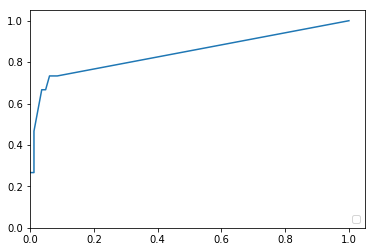

In [153]:
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend(loc=4)
plt.show(plt.plot(fpr,tpr,label ='ROC OF CART'))

In [131]:
net.predict_proba(X_test)

array([[2.3515479e-01],
       [3.7446532e-02],
       [5.5856740e-01],
       [8.7877616e-09],
       [2.1097645e-02],
       [1.3285156e-01],
       [2.4390424e-11],
       [2.3162170e-04],
       [1.5696736e-13],
       [1.4230847e-01],
       [3.0235329e-01],
       [3.6203396e-02],
       [3.9912673e-04],
       [2.4390424e-11],
       [3.7446532e-02],
       [1.7835801e-04],
       [1.3898412e-02],
       [1.1492464e-01],
       [4.2010330e-02],
       [9.9830711e-01],
       [3.9912673e-04],
       [2.1533726e-05],
       [4.9173803e-04],
       [9.9012237e-03],
       [5.9186493e-07],
       [1.5696736e-13],
       [6.2378538e-01],
       [7.0380943e-04],
       [3.9968572e-07],
       [5.0283708e-03],
       [2.1365497e-03],
       [3.9912673e-04],
       [1.3898412e-02],
       [3.9912673e-04],
       [8.3369011e-01],
       [6.2515952e-02],
       [1.1492464e-01],
       [1.4621269e-08],
       [3.2081562e-01],
       [3.2787120e-03],
       [4.9173803e-04],
       [1.507739

In [ ]:
#LM的ROC曲线

In [132]:
fpr2,tpr2 ,thresholds2 =roc_curve(y_test,net.predict_proba(X_test),pos_label =1)

In [137]:
roc_auc_score(y_test,net.predict_proba(X_test))

0.9138211382113821

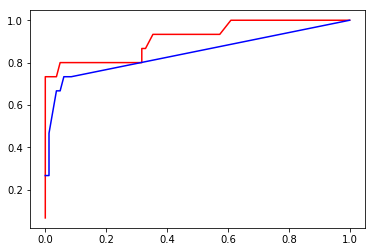

In [135]:
plt.show(plt.plot(fpr2,tpr2,label ='ROC OF LM',c='r'),plt.plot(fpr,tpr,label ='ROC OF CART',c='b'))

In [138]:
p=net.predict_proba(X_test)

In [141]:
p[p>0.5]

array([0.5585674, 0.9983071, 0.6237854, 0.8336901, 0.9934831, 0.6237854,
       0.5007274, 0.5585674, 0.6237854, 0.9923288, 0.5585674, 0.9693356],
      dtype=float32)

In [160]:
missing_data#.interpolate()

,user1,user2,user3
0,235.8333,324.0343,478.3231
1,236.2708,325.6379,515.4564
2,238.0521,328.0897,517.0909
3,235.9063,NaN,514.8900
4,236.7604,268.8324,NaN
5,NaN,404.0480,486.0912
6,237.4167,391.2652,516.2330
7,238.6563,380.8241,NaN
8,237.6042,388.0230,435.3508
9,238.0313,206.4349,487.6750


In [161]:
missing_data.interpolate()

,user1,user2,user3
0,235.83330,324.03430,478.32310
1,236.27080,325.63790,515.45640
2,238.05210,328.08970,517.09090
3,235.90630,298.46105,514.89000
4,236.76040,268.83240,500.49060
5,237.08855,404.04800,486.09120
6,237.41670,391.26520,516.23300
7,238.65630,380.82410,475.79190
8,237.60420,388.02300,435.35080
9,238.03130,206.43490,487.67500


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [16]:
clf =RandomForestClassifier()

In [25]:
scoring = ['precision_macro', 'recall_macro']
test_score =cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')

In [26]:
test_score

array([0.85      , 0.9       , 0.95      , 0.8       , 1.        ,
       0.95      , 0.94736842, 0.94736842, 1.        , 0.94444444])

In [27]:
clf.fit(X_train,y_train)
pre=clf.predict(X_test)

In [30]:
p=(pre+y_test)

In [35]:
1-len(p[p==1])/len(p)

0.9072164948453608

In [37]:
from sklearn.metrics import accuracy_score ,confusion_matrix  ,roc_auc_score
confusion_matrix(pre,y_test)

array([[77,  3],
       [ 6, 11]], dtype=int64)

In [38]:
fpr3,tpr3 ,thresholds3 =roc_curve(y_test,pre,pos_label =1)

In [42]:
roc_auc_score(y_test,pre)

0.8567125645438898

# 泛化性能：LM 神经网络> RandomForest >CartTree